# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Munifah Istniatika Rozana
- **Email:** munifahrozana0@gmail.com
- **ID Dicoding:** munifah_istniatika

## Menentukan Pertanyaan Bisnis

- Bagaimana performa sepeda yang dirental setiap musimnya pada tahun 2011?
- Bagaimana performa sepeda yang dirental setiap bulannya pada tahun 2011?

## Import Semua Packages/Library yang Digunakan

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [166]:
day_df = pd.read_csv("https://raw.githubusercontent.com/istnia/bike-sharing-dataset/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [167]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/istnia/bike-sharing-dataset/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [168]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [169]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [170]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [171]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [172]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [173]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [174]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [175]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [176]:
datetime_columns = ["dteday"]
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [177]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [178]:
datetime_columns = ["dteday"]
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [179]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explore data sepeda yang dirental berdasarkan *season* di tahun 2011

In [180]:
hour_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean"]
})

instant  cnt                
       nunique  max min        mean
season                             
1         4242  801   1  111.114569
2         4409  957   1  208.344069
3         4496  977   1  236.016237
4         4232  967   1  198.868856

In [181]:
hour_df.groupby(["season", "yr"])["cnt"].max().reset_index()

,season,yr,cnt
0,1,0,405
1,1,1,801
2,2,0,638
3,2,1,957
4,3,0,651
5,3,1,977
6,4,0,625
7,4,1,967


In [183]:
sum_season_df = hour_df.groupby(["season", "yr"])["cnt"].sum().reset_index()
print(sum_season_df)

   season  yr     cnt
0       1   0  150000
1       1   1  321348
2       2   0  347316
3       2   1  571273
4       3   0  419650
5       3   1  641479
6       4   0  326137
7       4   1  515476


### Explore data sepeda yang dirental berdasarkan bulan di tahun 2011

In [184]:
hour_df.groupby(by="mnth").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean"]
})

instant  cnt                
     nunique  max min        mean
mnth                             
1       1429  559   1   94.424773
2       1341  610   1  112.865026
3       1473  957   1  155.410726
4       1437  822   1  187.260960
5       1488  873   1  222.907258
6       1440  900   1  240.515278
7       1488  913   1  231.819892
8       1475  941   1  238.097627
9       1437  977   1  240.773138
10      1451  963   1  222.158511
11      1437  729   1  177.335421
12      1483  759   1  142.303439

In [185]:
hour_df.groupby(["mnth", "yr"])["cnt"].max().reset_index()

,mnth,yr,cnt
0,1,0,249
1,1,1,559
2,2,0,327
3,2,1,610
4,3,0,336
5,3,1,957
6,4,0,530
7,4,1,822
8,5,0,611
9,5,1,873


In [187]:
sum_monthly_df = hour_df.groupby(["mnth", "yr"])["cnt"].sum().reset_index()
print(sum_monthly_df)

    mnth  yr     cnt
0      1   0   38189
1      1   1   96744
2      2   0   48215
3      2   1  103137
4      3   0   64045
5      3   1  164875
6      4   0   94870
7      4   1  174224
8      5   0  135821
9      5   1  195865
10     6   0  143512
11     6   1  202830
12     7   0  141341
13     7   1  203607
14     8   0  136691
15     8   1  214503
16     9   0  127418
17     9   1  218573
18    10   0  123511
19    10   1  198841
20    11   0  102167
21    11   1  152664
22    12   0   87323
23    12   1  123713


Menggabungkan data

In [188]:
all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="instant",
    right_on="instant"
)
all_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa sepeda yang dirental setiap musimnya pada tahun 2011?

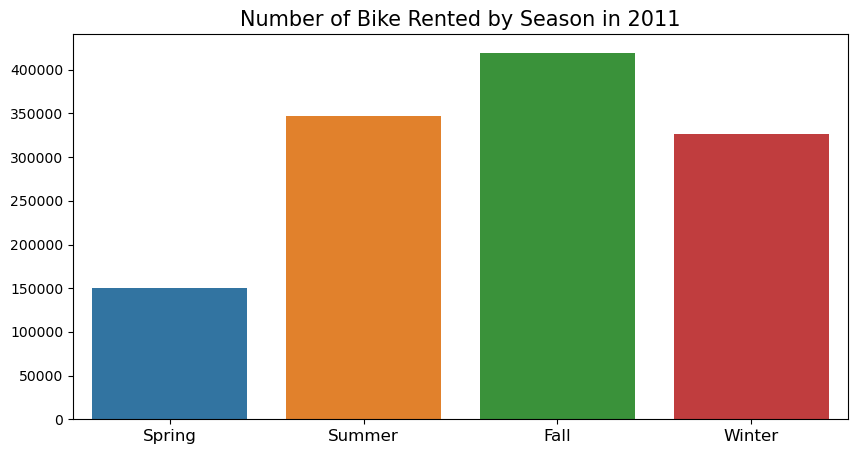

In [189]:
plt.figure(figsize=(10, 5))
data_2011 = sum_season_df[sum_season_df["yr"]==0] 
sns.barplot(
    y="cnt", 
    x="season",
    data=data_2011
)
season_label = ["Spring", "Summer", "Fall", "Winter"]
plt.xticks(ticks=range(len(season_label)), labels=season_label)
plt.title("Number of Bike Rented by Season in 2011", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

### Pertanyaan 2: Bagaimana performa sepeda yang dirental setiap bulannya pada tahun 2011?

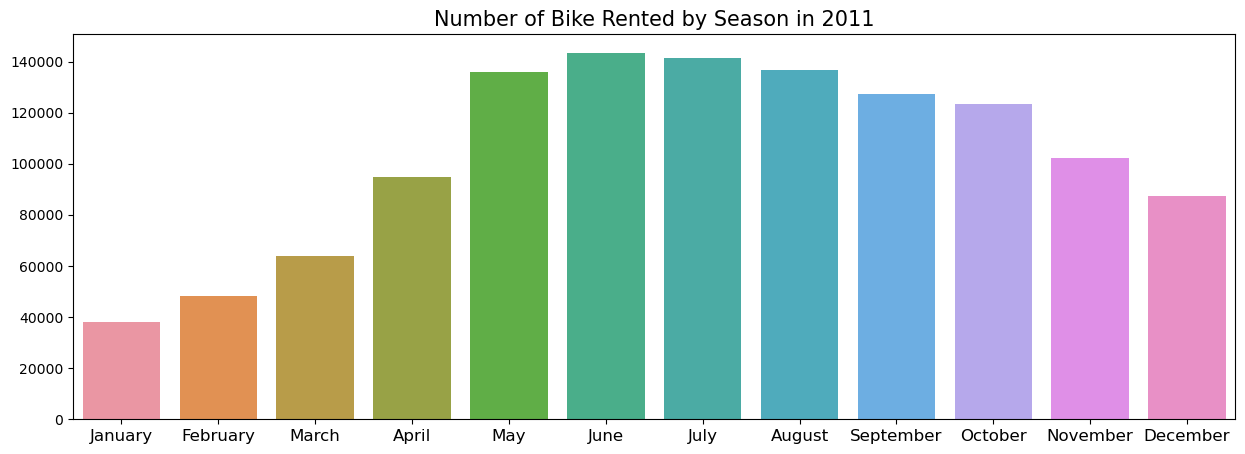

In [190]:
plt.figure(figsize=(15, 5))
data_2011 = sum_monthly_df[sum_monthly_df["yr"]==0] 
sns.barplot(
    y="cnt", 
    x="mnth",
    data=data_2011
)
season_label = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
plt.xticks(ticks=range(len(season_label)), labels=season_label)
plt.title("Number of Bike Rented by Season in 2011", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

## Conclusion

- Performa terbaik sepeda yang dirental setiap musimnya pada tahun 2011 dicapai di musim gugur/*fall*, yaitu mencapai 419650 buah sepeda. Sementara performa terburuk di musim semi/*spring*, yaitu hanya mencapai 150000 sepeda.
- Performa terbaik sepeda yang dirental setiap bulannya pada tahun 2011 dicapai di bulan Juni, yaitu mencapai 143512 buah sepeda. Sementara performa terburuk di bulan Januari, yaitu hanya mencapai 38189 sepeda.